In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

def mandelbrot(x, y):
    z = c = complex(x, y)
    iteration = 0
    max_iteration = 511  # arbitrary cutoff
    while abs(z) < 2 and iteration < max_iteration:
        z = z * z + c
        iteration += 1
    return iteration

def sum_values_for_partitions(rdd):
    'Returns (as an RDD) the sum of V for each partition of a (K, V) RDD'
    # note that the function passed to mapPartitions should return a sequence,
    # not a value.
    return rdd.mapPartitions(lambda part: [sum(V for K, V in part)])

def draw_image(rdd):
    '''Given a (K, V) RDD with K = (I, J) and V = count,
    display an image of count at each I, J'''
    data = rdd.collect()
    I = np.array([d[0][0] for d in data])
    J = np.array([d[0][1] for d in data])
    C = np.array([d[1] for d in data])
    im = np.zeros((I.max() + 1, J.max() + 1))
    im[I, J] = np.log(C + 1)  # log intensity makes it easier to see levels
    plt.imshow(im, cmap=cm.gray)
    plt.show()



In [3]:
import random
i=sc.parallelize(range(2000),10)
j=sc.parallelize(range(2000),10)
mandle=i.cartesian(j).map(lambda x: (x,mandelbrot(x[1]/500.0-2,x[0]/500.0-2))).cache()

0
1
2


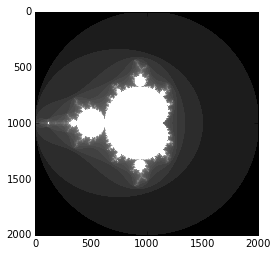

In [4]:
draw_image(mandle)

In [42]:
import random
i=sc.parallelize(range(2000),10)
j=sc.parallelize(range(2000),10)

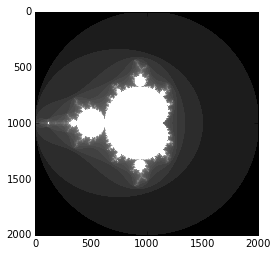

In [50]:
mandle2=i.cartesian(j).partitionBy(100,lambda x: random.randint(0,1999)).map(lambda x: (x,mandelbrot(x[1]/500.0-2,x[0]/500.0-2))).cache()
draw_image(mandle)

(array([  2.,   4.,   8.,  19.,  15.,  23.,  16.,   8.,   3.,   2.]),
 array([ 1898977. ,  1925292.2,  1951607.4,  1977922.6,  2004237.8,
         2030553. ,  2056868.2,  2083183.4,  2109498.6,  2135813.8,
         2162129. ]),
 <a list of 10 Patch objects>)

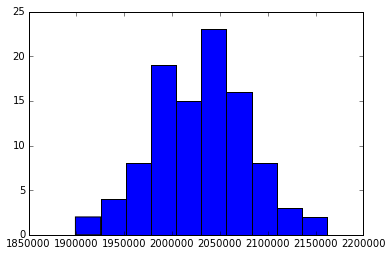

In [61]:
plt.hist(sum_values_for_partitions(mandle2).collect())